In [ ]:
# v1/v2 = N1/N2 = I2/I1

# Ex 2.1

In [1]:
import numpy as np,cmath
from cmath import rect
from math import radians

In [2]:
import networkx,numpy as np
class Trafo:
    def __init__(self,vp,vs,s,xf) -> None:
        self.vp = vp
        self.vs = vs
        self.s = s
        self.xf = xf
        self.n = vp/vs # relação de transformação
def polar(number:complex):
    module = abs(number)
    angle = np.rad2deg(np.arctan2(number.imag,number.real))

    return module,angle

def retangular(number:tuple[float,float]):
    return cmath.rect(number[0],np.deg2rad(number[1]))

def regulacao_de_tensao(tensao_sem_carga:float,tensao_plena_carga:float):
    return 100*(abs(tensao_sem_carga)-abs(tensao_plena_carga))/abs(tensao_plena_carga)


def calcula_corrente(potencia_base,tensao_base):
    return potencia_base/(3**.5 * tensao_base)

def calcula_z_pu(potencia_base,trafo:Trafo,tensao_base_primario):

    return trafo.xf*potencia_base/trafo.s * (trafo.vp/tensao_base_primario)**2*1j

def calcula_tensao_base(base_anterior,trafo:Trafo):
    return base_anterior/trafo.relacao

def cria_matriz_admitancia(nodes:list[int],edges):
    # Create a directed graph
    G = networkx.DiGraph()
    G.add_nodes_from(sorted(nodes))
    for u, v, w in edges:
        G.add_weighted_edges_from([(u, v, -w), (v, u, -w)])
    # Display the adjacency matrix
    adj_matrix = networkx.adjacency_matrix(G).todense()
    for i in G.nodes():
        adj_matrix[i - 1, i - 1] = -sum(G[i][j]["weight"] for j in G[i])

    return adj_matrix

def calcula_z_base(tensao_base_antiga,tensao_base_nova,potencia_base_antiga,potencia_base_nova,reatancia):
    '''
    Alteração de Z para nova base em p.u
    z' = z*nova_base/antiga_base*(vb_nova/vb_anterior)**2
    '''
    zb = 1j*reatancia*(potencia_base_nova/potencia_base_antiga)*(tensao_base_antiga/tensao_base_nova)**2
    return zb


In [4]:
n1 = 2000
n2 = 500
v1 = 1200
i1 = retangular((5,-30))
i1

(4.330127018922194-2.4999999999999996j)

In [ ]:
n = n1/n2
v2 = v1/n
#v1*i1 = v2*i2
i2 = v1*i1/v2
z2 = v2/i2
z2_ = z2*n**2

v2,polar(i2),polar(z2),polar(z2_)

(300.0,
 (20.0, -29.999999999999993),
 (15.0, 29.999999999999996),
 (240.0, 29.999999999999996))

# Exercicio 2.2

In [ ]:
n1 = 2000
n2 = 500
n = n1/n2
r1 = 2
r2 = .125
x1 = 8
x2 = .5
rl = 12*n**2
v1 = 1200

req = r1 + r2*n**2
xeq = (x1 + x2*n**2)*1j
zeq = req+xeq
i = v1/(zeq+rl)
v2 = rl*i/n
polar(v2)

(292.9032340376644, -4.6668583714389955)

In [ ]:
v1,v2

(1200, (291.932147290029-23.83119569714522j))

In [ ]:
rt = regulacao_de_tensao(v1/n,v2)
rt

2.4229046106821195

# Exemplo 2.7

In [5]:
sb = 75e6
vb1 = 66e3
n = 38.1/3.81
vb2 = vb1/n
vb1,vb2

(66000.0, 6600.0)

In [8]:
# Y na alta, z = 0.6ohm/fase
z = 0.6
z_base = vb1**2/sb
z_base


58.08

# Ex 2.9

In [ ]:
sb = 100e6
vbl = 230e3
# gerador 300MVA, 23kV. Rl 240MVA. fp=.9 indutivo
#D-Y
ta = Trafo(230e3,23e3,330e6,11/100)
vb1 = calcula_tensao_base(vbl,ta)
vb1

23000.0

In [ ]:
zb = calcula_z_base(vb1,vb1,ta.s,sb,ta.xf)
zb


0.03333333333333333j

In [ ]:
ib2 = calcula_corrente(sb,vbl)
ib2

251.02185616940253

In [ ]:
ia_carga = calcula_corrente(240e6,vbl)
ia_carga



602.452454806566

In [ ]:
ia_pu = ia_carga/ib2
ia_pu # Modulo

2.4

In [ ]:
ia_angulo = -np.rad2deg(np.arccos(.9)) # angulo
ia_angulo

-25.841932763167126

In [ ]:
ib = (ia_pu,ia_angulo-120)
ic = (ia_pu,ia_angulo+120)

print(ib)
print(ic)

(2.4, -145.84193276316714)
(2.4, 94.15806723683288)


In [ ]:
# No gerador
Ia = ia_pu,ia_angulo-30
Ib = ia_pu,ib[1]-30
Ic = ia_pu,ic[1]-30

print(Ia)
print(Ib)
print(Ic)

(2.4, -55.84193276316712)
(2.4, -175.84193276316714)
(2.4, 64.15806723683288)


# Trafo de 3 enrolamentos

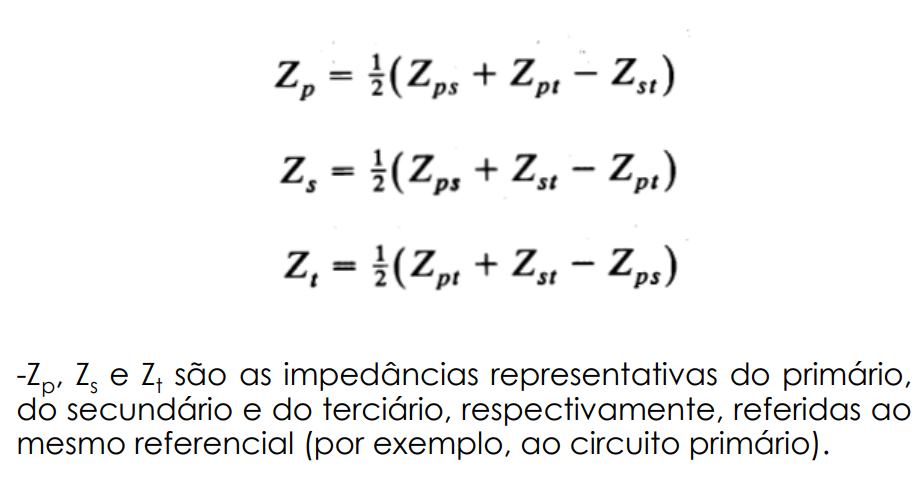

# 2.11

In [ ]:
#Base de 15MVA e 66kV
sb = 15e6
vb = 66e3
zps = calcula_z_base(66e3,vb,15e6,sb,7/100)
zpt = calcula_z_base(66e3,vb,15e6,sb,9/100)
zst = calcula_z_base(vb,vb,10e6,sb,8/100)

zps,zpt,zst # É p.u na base de 15MVA e 66kV

(0.07j, 0.09j, 0.12j)

In [ ]:
zp = (zps+zpt-zst)/2
zs = (zps+zst-zpt)/2
zt = (zpt+zst-zps)/2
zp,zs,zt

(0.020000000000000004j, 0.05j, 0.06999999999999999j)

https://professor.pucgoias.edu.br/SiteDocente/admin/arquivosUpload/18795/material/03%29SistEletricosCap03-pu_e_elementos.pdf

# Ex 3.9

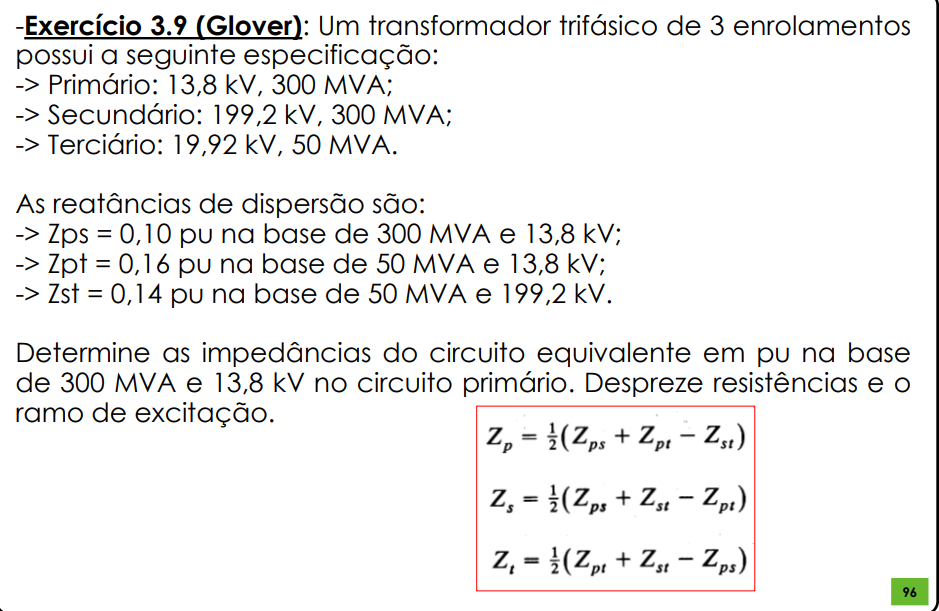

In [ ]:
sb = 300e6
vb1 = 13.8e3
vb2 = 199.2e3
vb3 = 19.92e3
zps = calcula_z_base(vb1,vb1,sb,sb,.1)
zpt = calcula_z_base(vb1,vb1,50e6,sb,.16)
zst = calcula_z_base(vb1,vb1,50e6,sb,.14)


In [ ]:
zp = (zps+zpt-zst)/2
zs = (zps+zst-zpt)/2
zt = (zpt+zst-zps)/2
zp,zs,zt

(0.10999999999999999j, -0.009999999999999953j, 0.85j)

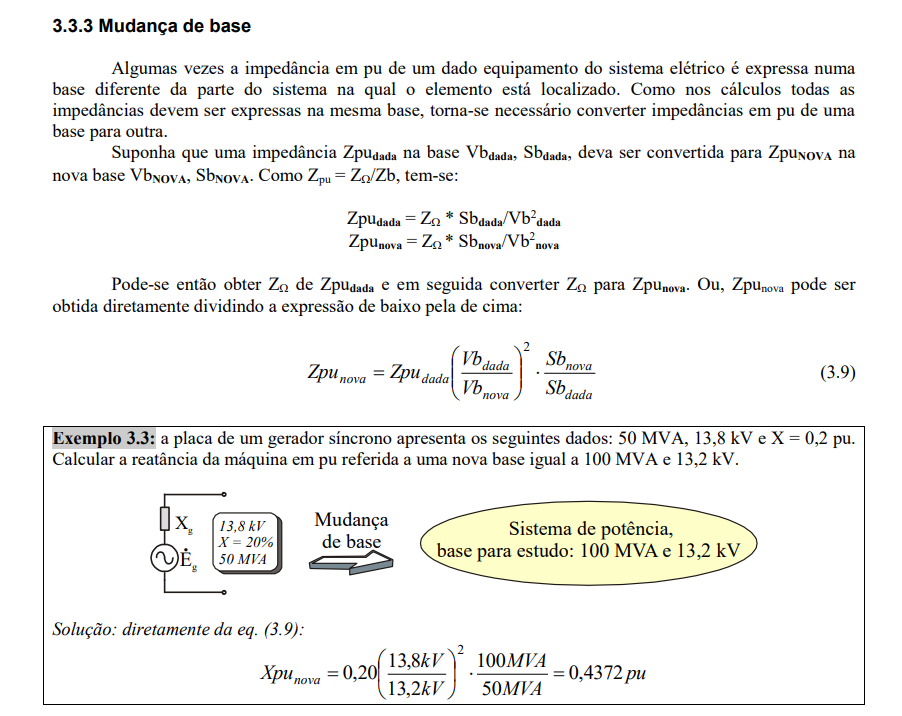

# Quadripolos

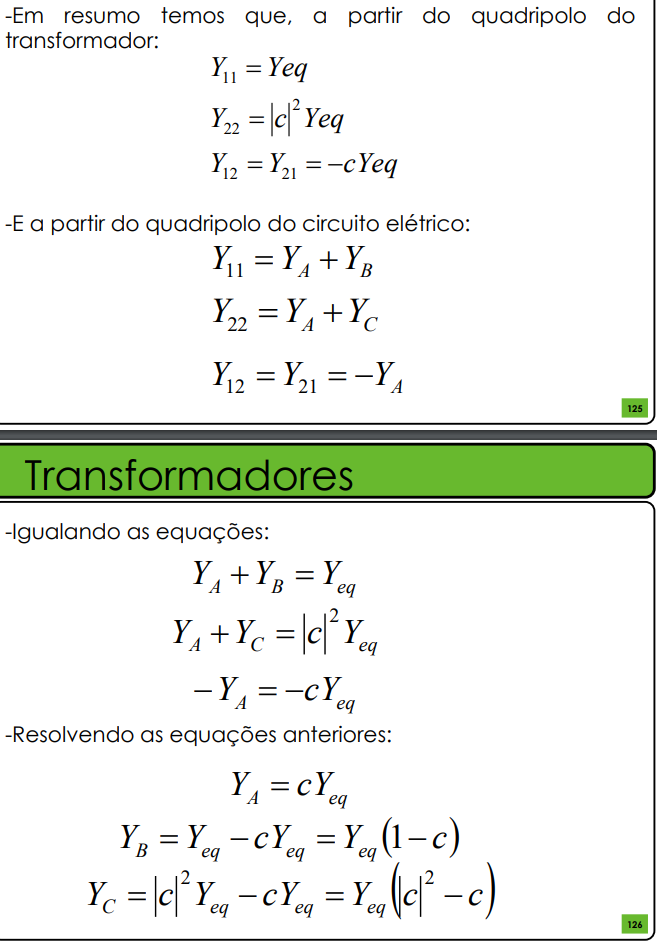

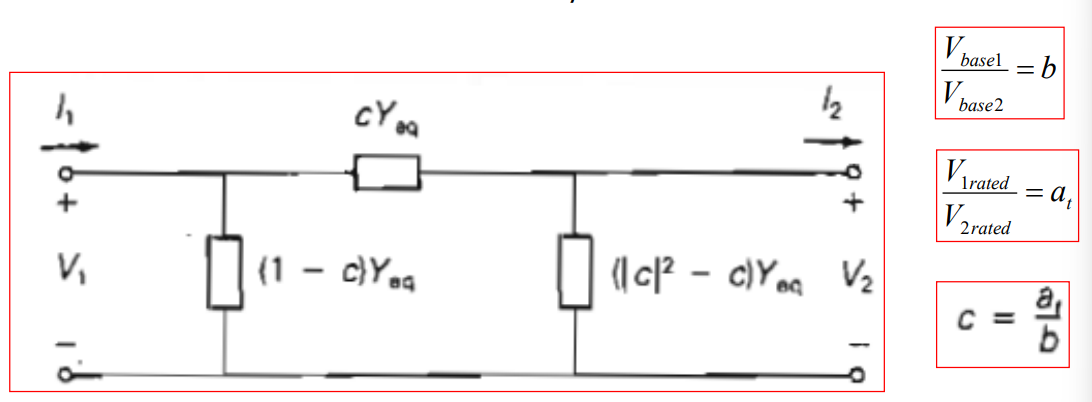

a_t é a proporção entre v_1rated e v_2rated

b é a proporção entre Vb1 e Vb2

c é a_t/b

c = |c| ∠ ϑ

E1 = cE2

I1 = I2/c*

Z_2refletido = |c|² Z_2

Y11 = Yeq = Ya + Yb

Y22 = |c|² * Yeq = Ya + Yc

Y12 = -c * Yeq = -Ya

Y21 = -c* * Yeq = -Ya


# Ex 3.12
Um transformador trifásico elevador de 100
MVA, 13,8 kV-D/345 kV-Y, possui Zeq
= j0,10 pu. Seu enrolamento de
alta tensão possui taps de +- 10%.
Adotando uma base de 50 MVA e 13,8 kV no lado de baixa tensão,
determine:
-> Os valores em pu de seu circuito equivalente considerando (a)
tap nominal e (b) tap de -10 % (promovendo uma redução de 10 %
na tensão no lado de alta tensão).

In [ ]:

sb = 50e6
vb1 = 13.8e3
a = 13.8e3 / 345e3
b = 13.8e3 / 345e3
c = a/b
a,b,c


(0.04, 0.04, 1.0)

In [ ]:
zeq = calcula_z_base(vb1,vb1,100e6,50e6,.1)
yeq = 1/zeq
zeq,yeq

ya = c*yeq
yb = yeq*(1-c)
yc = yeq*(abs(c)**2 -c)

ya,yb,yc

(-20j, 0j, 0j)

## Com -10% no lado de alta

In [ ]:

sb = 50e6
vb1 = 13.8e3
a = 13.8e3 / (345e3*.9)
b = 13.8e3 / (345e3) # A base mantém como anterior, vai mudar a tensão só no a
c = a/b
a,b,c

(0.044444444444444446, 0.04, 1.1111111111111112)

In [ ]:
zeq = calcula_z_base(vb1,vb1,100e6,50e6,.1)
yeq = 1/zeq
zeq,yeq


(0.05j, -20j)

In [ ]:

ya = c*yeq
yb = yeq*(1-c)
yc = yeq*(abs(c)**2 -c)

ya,yb,yc

(-22.22222222222222j, 2.222222222222223j, -2.469135802469138j)

# 3.13

In [ ]:
l1 = .25
l2 = .2
dv = .05
c = (1+dv)**-1
zeq = (.2*.25)/.45
zeq

0.11111111111111112